In [67]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata, spearmanr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

**NB**: Confusingly, the code and Pandas tables label a quantity `sim` which is actually the *distance* (correlation distance) between sentence pairs. Sorry. We'll fix this before sharing.

In [68]:
rep1 = "baseline"
rep2 = "imdbsentiment"
names = ["rep", "idx", "sim", "sent1", "sent2"]
try:
    sims = pd.read_csv("sim_384sentences.%s_384sentences.%s.csv" % (rep1, rep2), header=None, names=names)
except FileNotFoundError:
    sims = pd.read_csv("sim_384sentences.%s_384sentences.%s.csv" % (rep2, rep1), header=None, names=names)
    
sims = sims.set_index(["rep", "idx"])
sims.head()

sim  \
rep                   idx             
384sentences.baseline 0    0.035731   
                      1    0.111796   
                      2    0.136106   
                      3    0.136417   
                      4    0.142251   

                                                                       sent1  \
rep                   idx                                                      
384sentences.baseline 0                         A man is a male human adult.   
                      1    A train station is a place where passengers ge...   
                      2    A car can be powered by a gasoline or electric...   
                      3           Broccoli is a plant in the cabbage family.   
                      4    An apple is a fruit that can be green, red or ...   

                                                                       sent2  
rep                   idx                                                     
384sentences.baseline 0                     A woman is a female human adult.  
                      1    Passengers or cargo trains enter from a platfo...  
                      2    Saws can be worked by hand, or powered by an e...  
                      3    Lentils are the seeds of a plant of the legume...  
                      4    Lentils can be red, green, brown, black or yel...

In [69]:
sent_pairs = list(set(zip(sims.sent1, sims.sent2)))
len(sent_pairs)

73536

In [70]:
sims = sims.reset_index().set_index(["rep", "sent1", "sent2"]).sort_index()
sims.head()

idx  \
rep                   sent1                                              sent2                                                       
384sentences.baseline A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   2335   
                                                                         A bed is a piece of furniture used as a place t...   7757   
                                                                         A bed is made of a mattress and a box spring, p...  27555   
                                                                         A bee is a flying insect, with a black and yell...   8084   
                                                                         A bicycle is a vehicle with two wheels and peda...  58160   

                                                                                                                                  sim  
rep                   sent1                                              sent2                                                         
384sentences.baseline A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.599438  
                                                                         A bed is a piece of furniture used as a place t...  0.719388  
                                                                         A bed is made of a mattress and a box spring, p...  0.884466  
                                                                         A bee is a flying insect, with a black and yell...  0.724178  
                                                                         A bicycle is a vehicle with two wheels and peda...  1.069423

In [71]:
pair_sims_rep1 = sims.loc["384sentences.%s" % rep1].sim
pair_sims_rep2 = sims.loc["384sentences.%s" % rep2].sim

In [72]:
pair_sims_rep1.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.       0.599438
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.            0.719388
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.    0.884466
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              0.724178
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     1.069423
Name: sim, dtype

In [73]:
spearmanr(pair_sims_rep1, pair_sims_rep2)

SpearmanrResult(correlation=0.10034080540981775, pvalue=7.665788498575479e-164)

In [74]:
rep1_ranks = rankdata(pair_sims_rep1)
rep2_ranks = rankdata(pair_sims_rep2)

In [75]:
list(zip(rep1_ranks, rep2_ranks))[:20]

[(2336.0, 8929.0),
 (7758.0, 11212.0),
 (27556.0, 60712.0),
 (8085.0, 6643.0),
 (58161.0, 67127.0),
 (28573.0, 65971.0),
 (68677.0, 50266.0),
 (73238.0, 69838.0),
 (26438.0, 51956.0),
 (9427.0, 2188.0),
 (3591.0, 2914.0),
 (29754.0, 55665.0),
 (73177.0, 26690.0),
 (53337.0, 14508.0),
 (8916.0, 3854.0),
 (26771.0, 4970.0),
 (41238.5, 13584.0),
 (33896.0, 71875.0),
 (45232.0, 24151.0),
 (51866.5, 55083.0)]

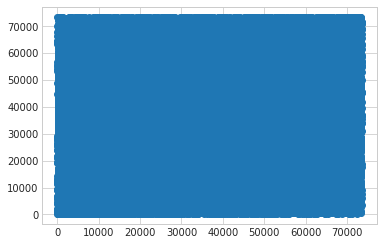

In [76]:
plt.scatter(rep1_ranks, rep2_ranks)

In [77]:
sims.loc[("384sentences.%s" % rep1, slice(None), slice(None)), "sim_rank"] = rep1_ranks
sims.loc[("384sentences.%s" % rep2, slice(None), slice(None)), "sim_rank"] = rep2_ranks
sims.head()

idx  \
rep                   sent1                                              sent2                                                       
384sentences.baseline A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...   2335   
                                                                         A bed is a piece of furniture used as a place t...   7757   
                                                                         A bed is made of a mattress and a box spring, p...  27555   
                                                                         A bee is a flying insect, with a black and yell...   8084   
                                                                         A bicycle is a vehicle with two wheels and peda...  58160   

                                                                                                                                  sim  \
rep                   sent1                                              sent2                                                          
384sentences.baseline A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.599438   
                                                                         A bed is a piece of furniture used as a place t...  0.719388   
                                                                         A bed is made of a mattress and a box spring, p...  0.884466   
                                                                         A bee is a flying insect, with a black and yell...  0.724178   
                                                                         A bicycle is a vehicle with two wheels and peda...  1.069423   

                                                                                                                             sim_rank  
rep                   sent1                                              sent2                                                         
384sentences.baseline A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    2336.0  
                                                                         A bed is a piece of furniture used as a place t...    7758.0  
                                                                         A bed is made of a mattress and a box spring, p...   27556.0  
                                                                         A bee is a flying insect, with a black and yell...    8085.0  
                                                                         A bicycle is a vehicle with two wheels and peda...   58161.0

## Rank differences

Let's compare differences in the ranks of sentence pair similarities, arbitrarily taking the difference `rep1_rank - rep2_rank`. Highly negative values indicate that `rep1` ranks the pair far lower distance (higher similarity) than `rep2`.

In [78]:
sim_rank_differences = sims.loc["384sentences.%s" % rep1].sim_rank - sims.loc["384sentences.%s" % rep2].sim_rank
sim_rank_differences.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.       -6593.0
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.            -3454.0
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.   -33156.0
                                                                           A bee is a flying insect, with a black and yellow body and six legs.               1442.0
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     -8966.0
Name: sim_rank, dtype

In [79]:
sim_rank_differences.sort_values()

sent1                                                                                  sent2                                                                               
A boy is a young male child who has not undergone puberty.                             An adult male behaving immaturely is often referred to as a boy.                       -73327.0
A dress is like a shirt attached to a long, matching skirt.                            Sweaters differ in cut, collar and sleeve shape, as well as decoration.                -73010.0
Gloves to protect against cold are made of wool or lined waterproof material.          Sweaters are often knitted from wool but cotton is also common.                        -72912.0
A boy is a young male child who has not undergone puberty.                             A girl is a female human who has not yet reached maturity.                             -72876.0
Murder a serious crime because it deprives the victim of their existence.              A convict